## Установка библиотек

In [1]:
!pip install plotly >> None

In [11]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Предобработка

In [28]:
df = pd.read_csv('history_one_metric_cleared.csv')
df['clock'] = pd.to_datetime(df.clock)
df = df[['clock', 'value_avg']]
df.set_index('clock', inplace=True)

In [29]:
df

,value_avg
clock,
2021-12-29 12:00:00,0.9491
2021-12-29 13:00:00,0.4578
2021-12-29 14:00:00,0.2668
2021-12-29 15:00:00,0.1656
2021-12-29 16:00:00,0.2038
...,...
2022-12-29 06:00:00,1.5824
2022-12-29 07:00:00,1.1263
2022-12-29 08:00:00,1.2200


## Визуализация

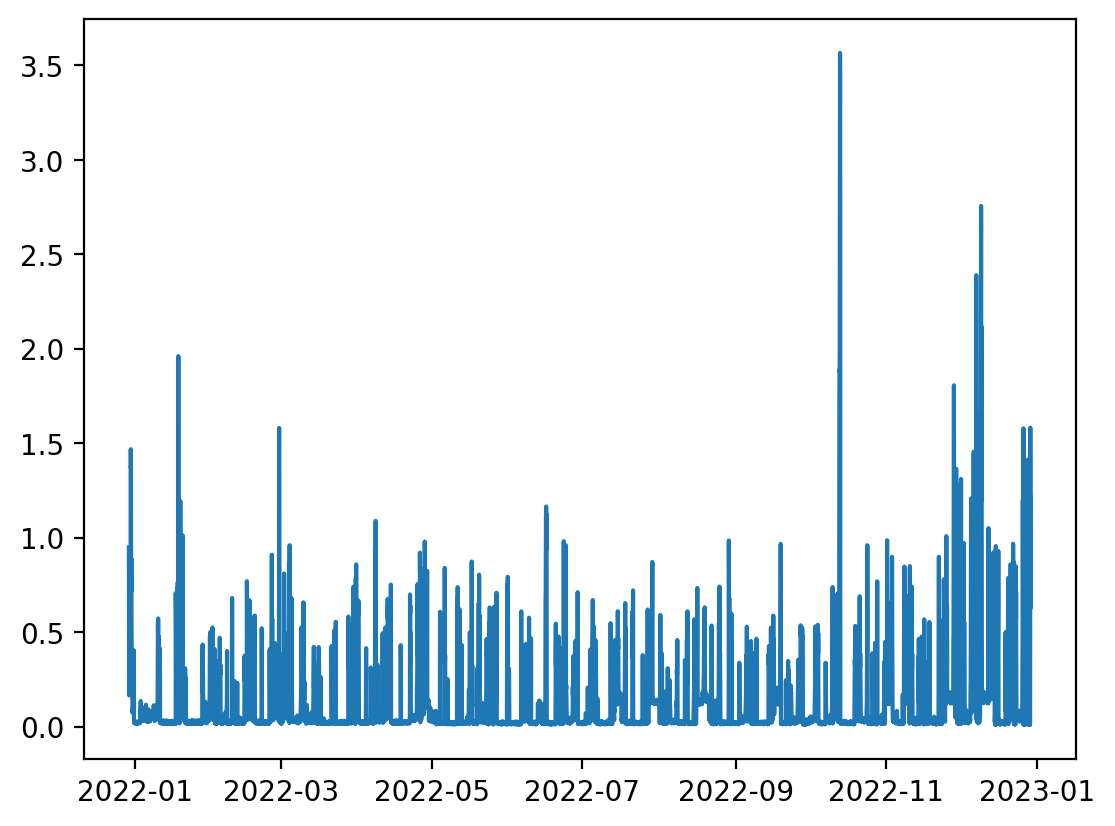

In [30]:
plt.plot(df)

In [31]:
from prophet import Prophet
n = 100

# приводим dataframe к нужному формату
df = df.reset_index()
df.columns = ['ds', 'y']

# отрезаем из обучающей выборки последние n точек, чтобы измерить на них качество
train_df = df[:-n]

In [32]:
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=n)
forecast = m.predict(future)

10:48:08 - cmdstanpy - INFO - Chain [1] start processing
10:48:10 - cmdstanpy - INFO - Chain [1] done processing


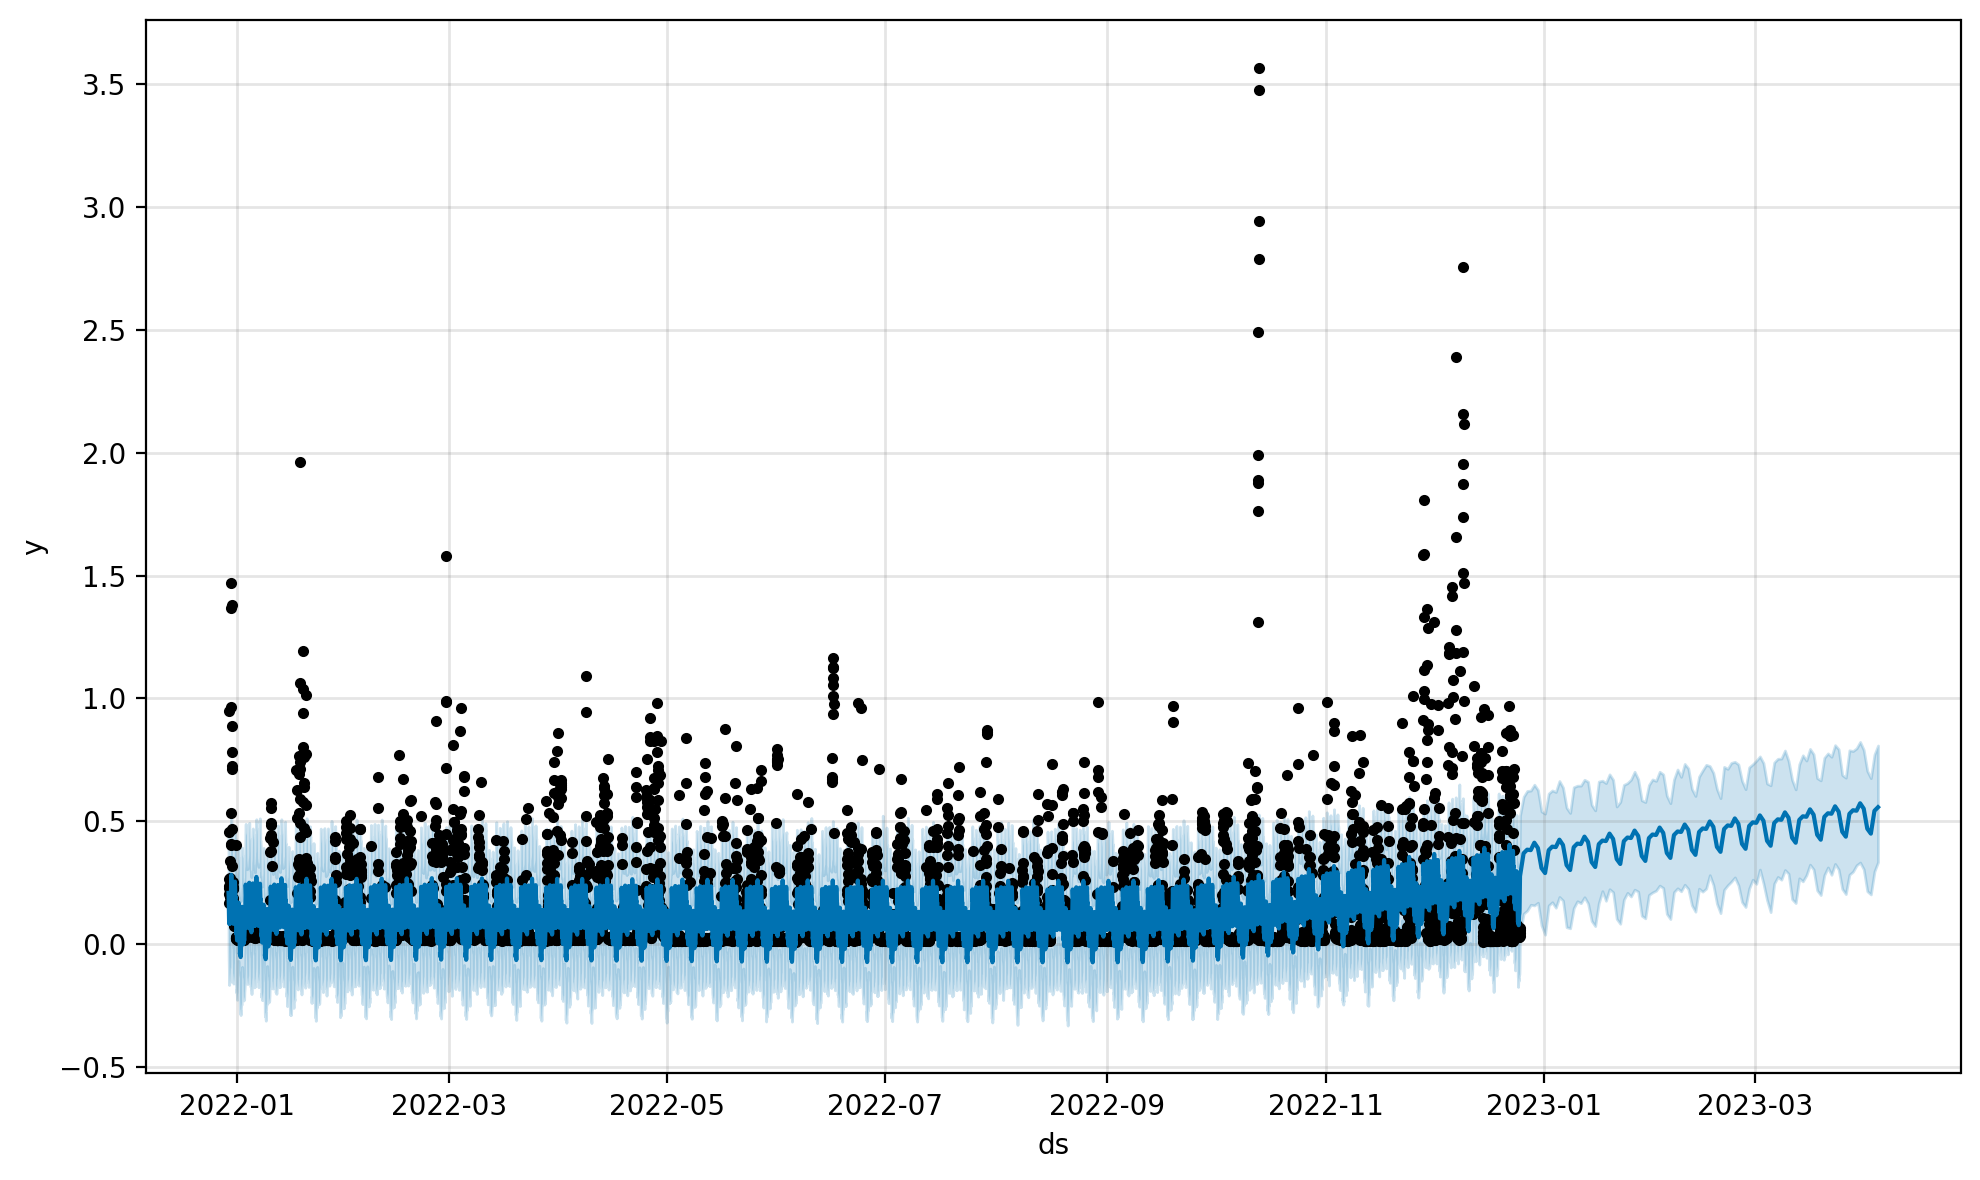

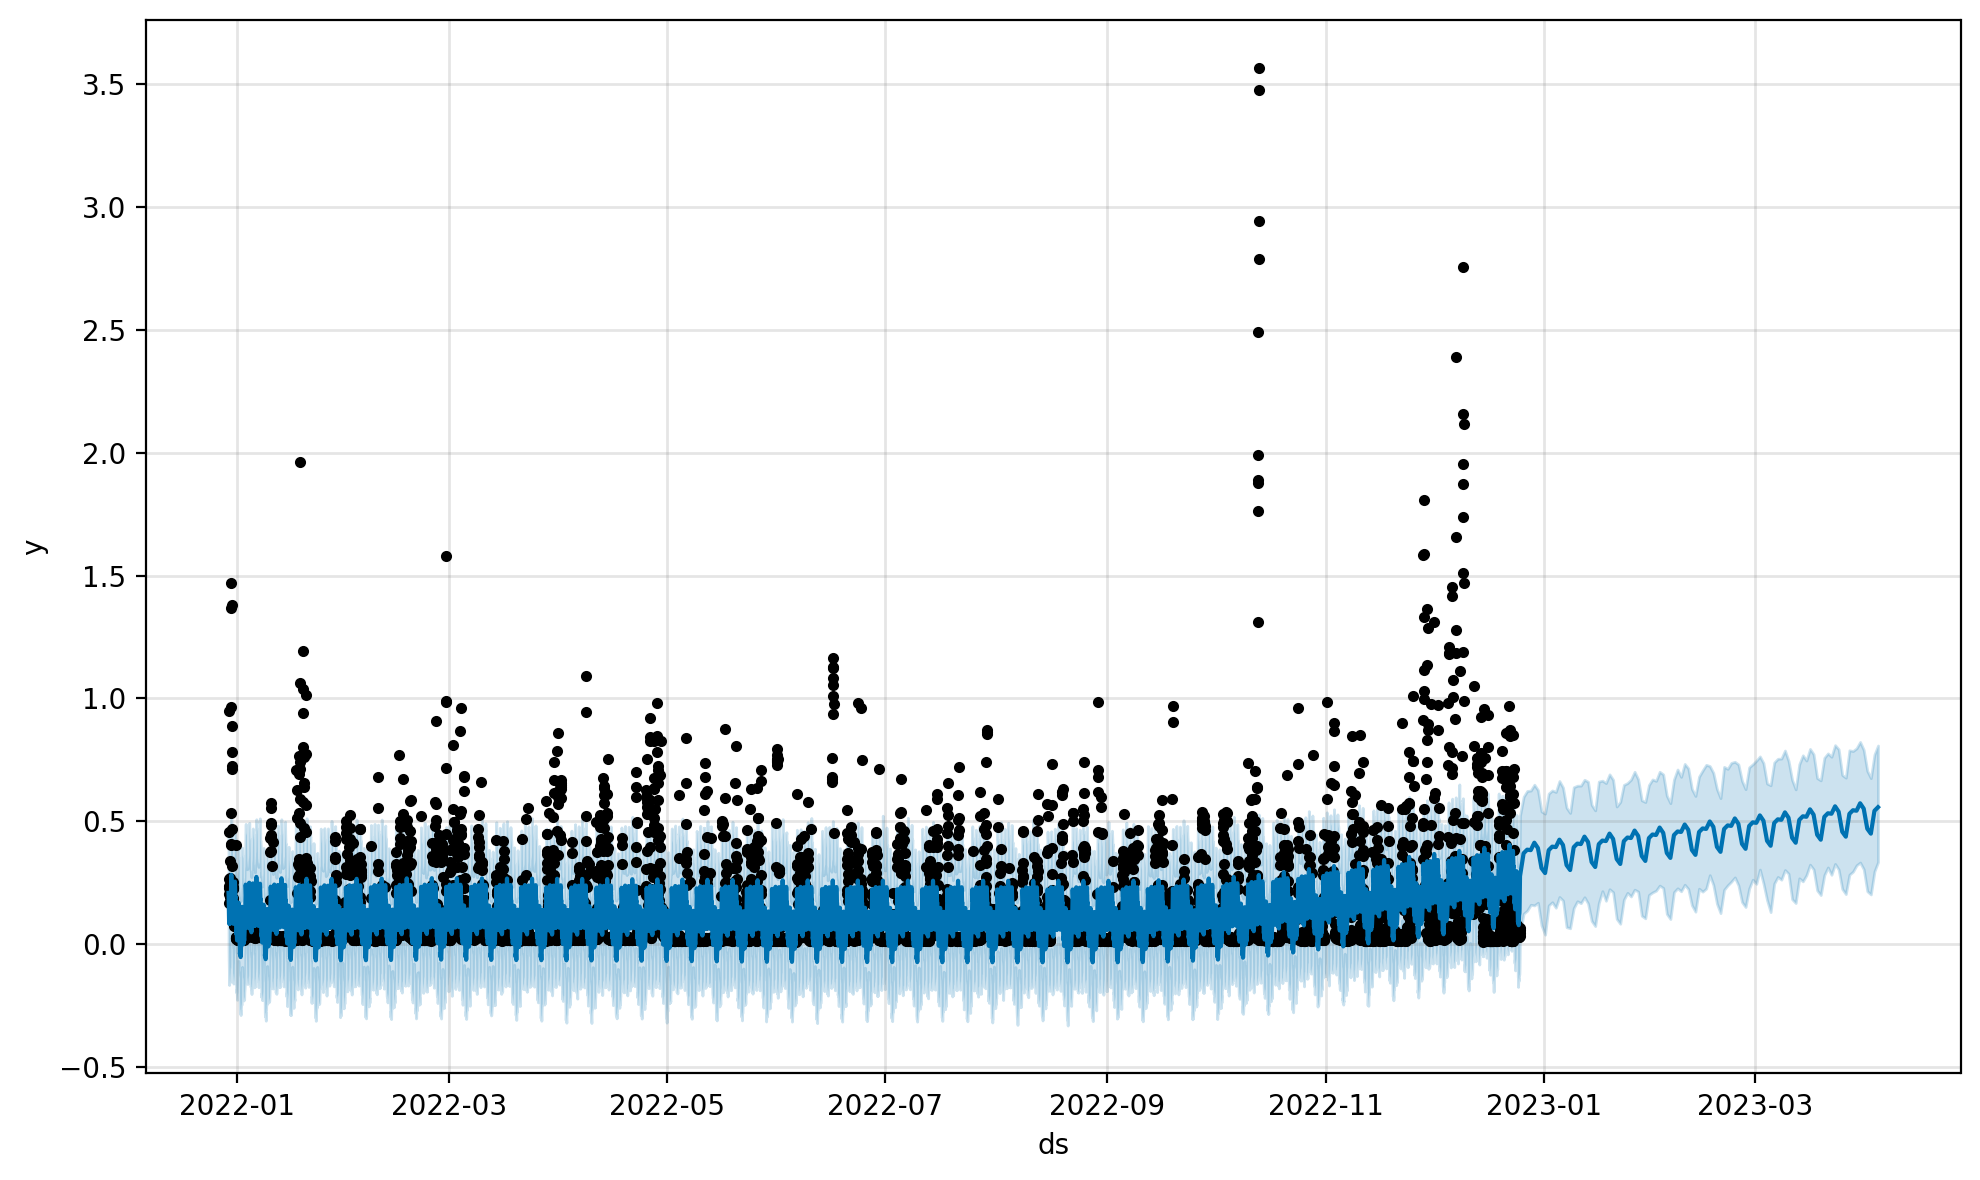

In [33]:
m.plot(forecast)

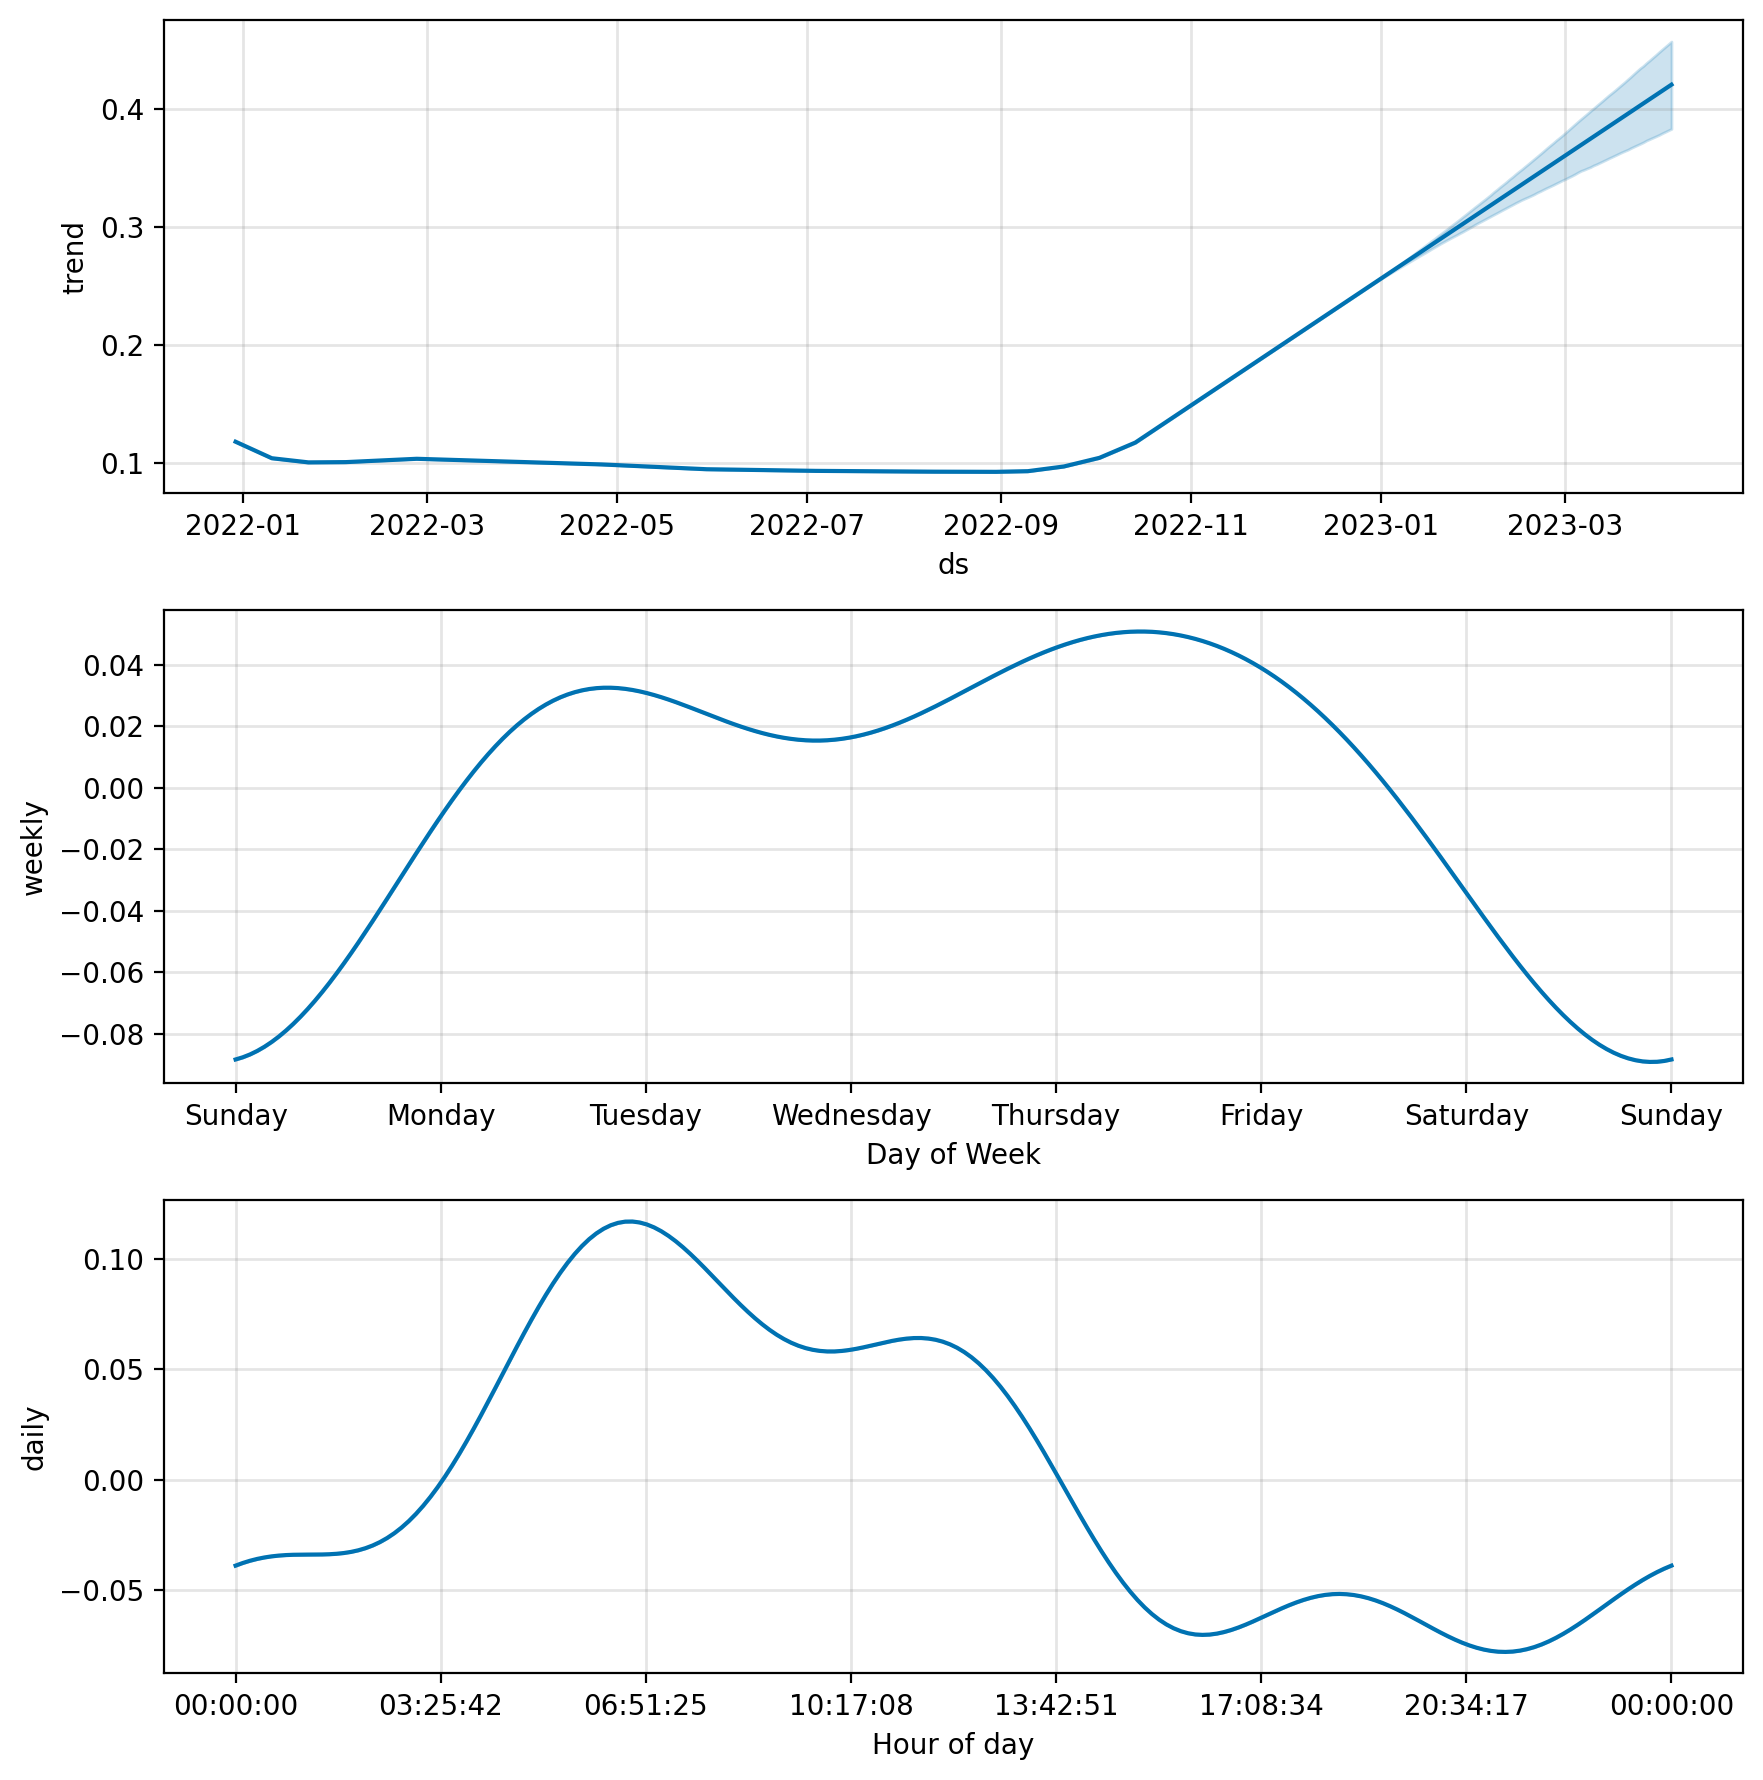

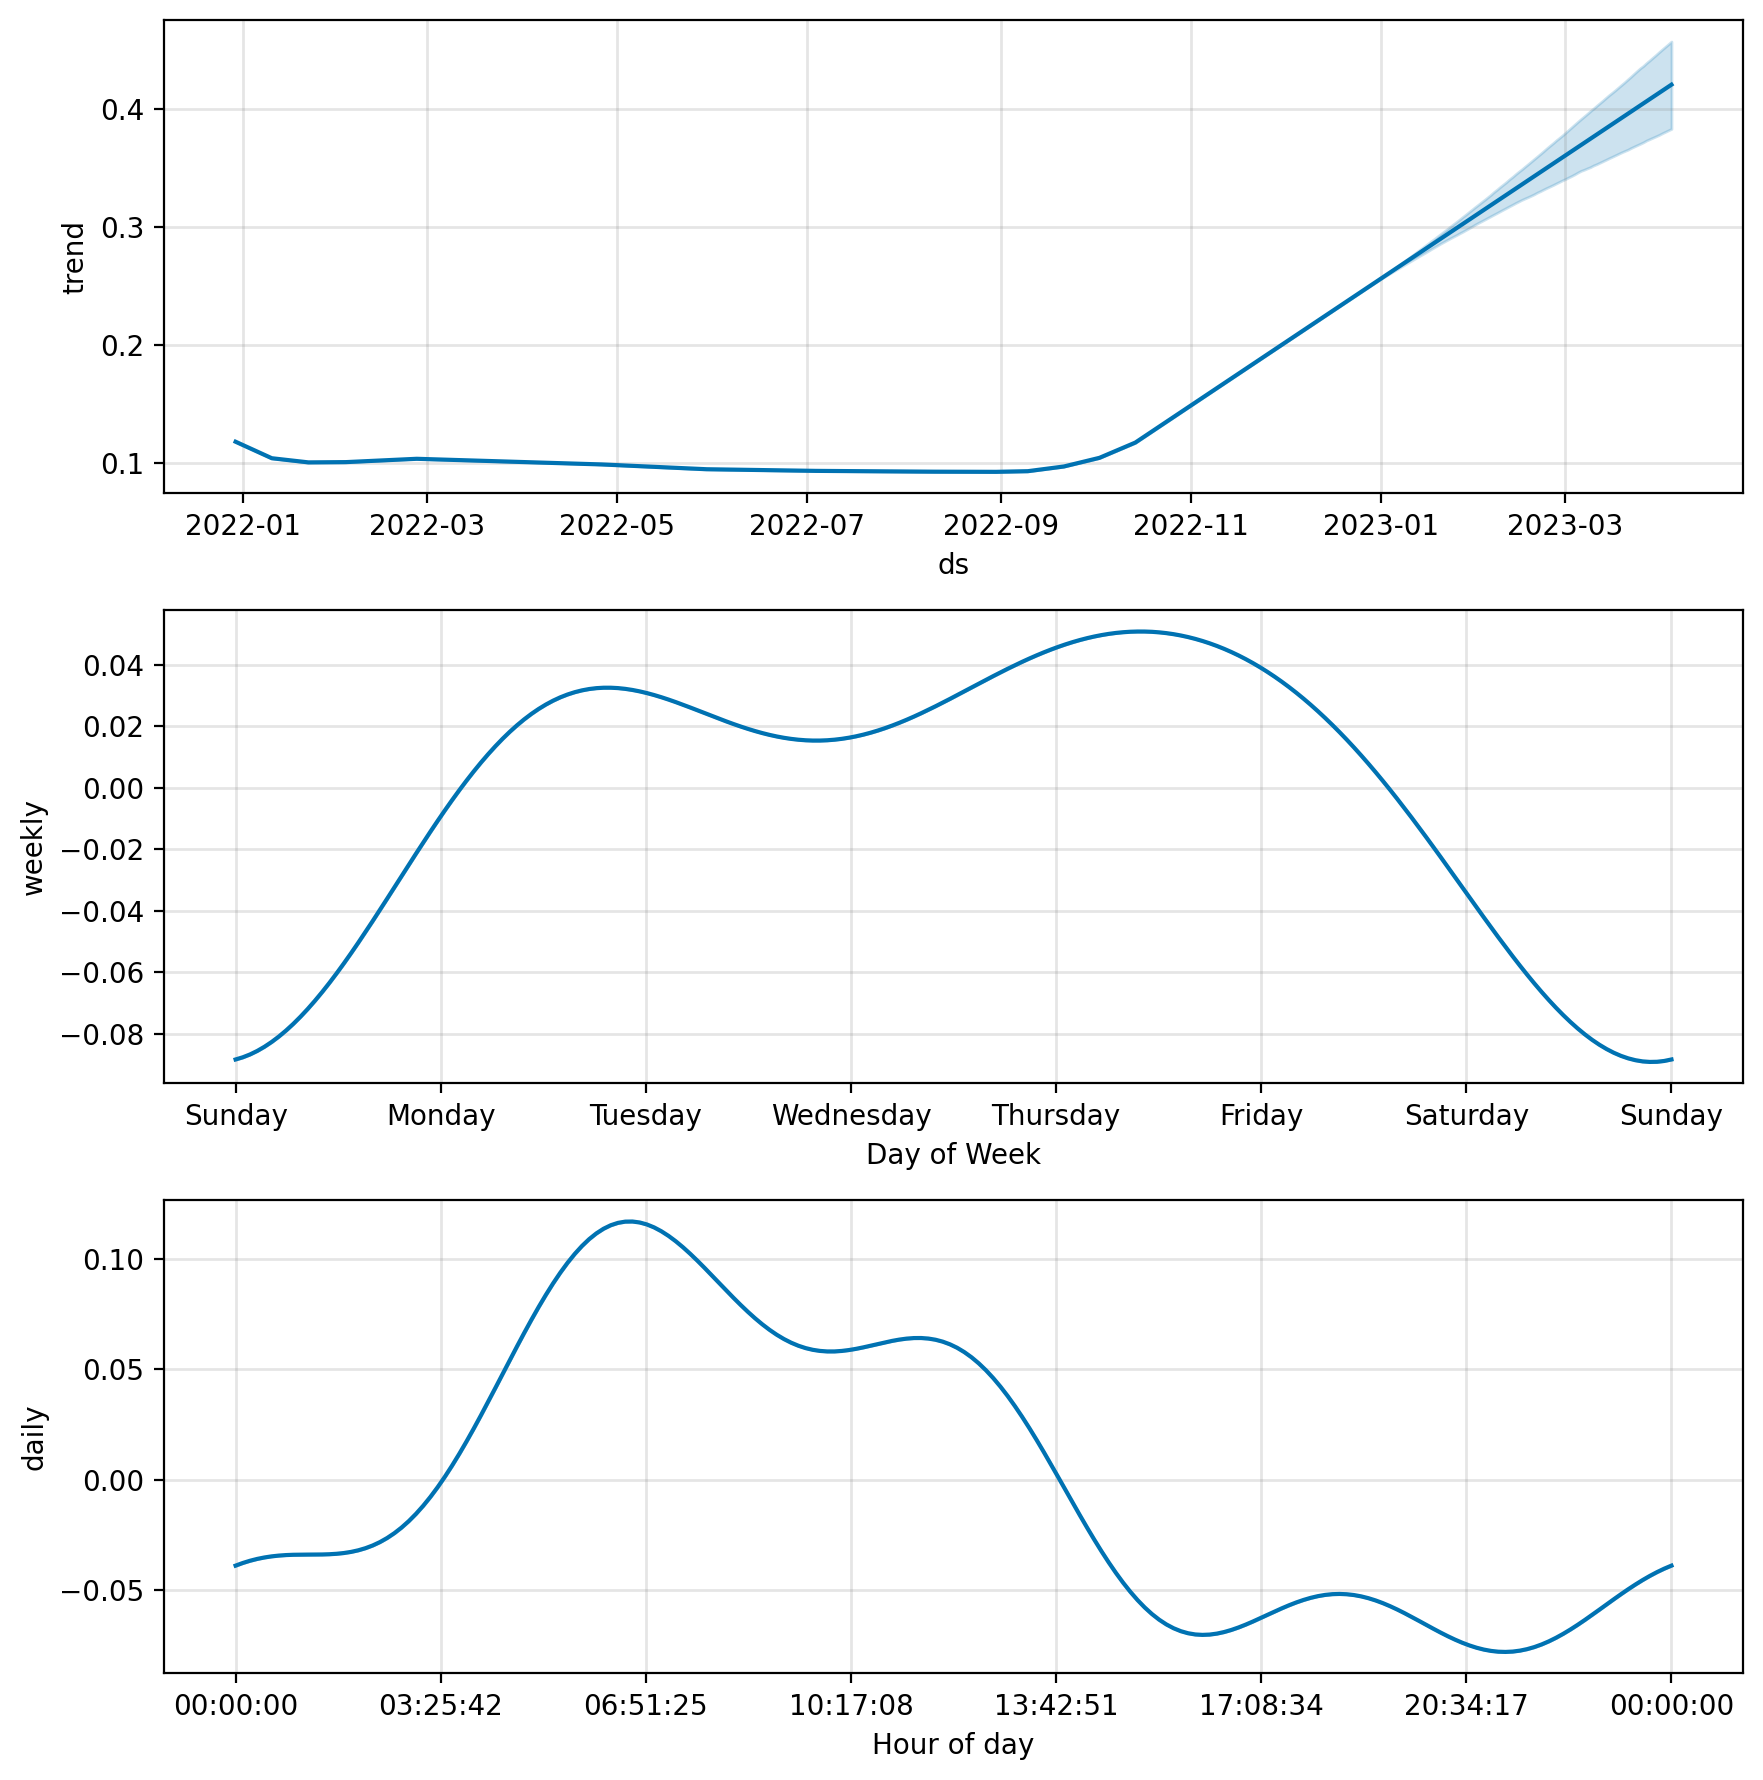

In [34]:
m.plot_components(forecast)

In [35]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [36]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print('MAPE', np.mean(abs(cmp_df[-n:]['p'])))
print('MAE', np.mean(abs(cmp_df[-n:]['e'])))


MAPE 819.9651948703505
MAE 0.7586536739913967
